# Flight Delay Prediction
## Pipe Lining

- Preprocess Dataset with rows for ArrDelayMinutes and ArrDel15
- Split for training and classification
- Classify whether the flight will be delayed or not
- Pipeline for regression to determine by how long it will be delayed
- Perform regression analysis based on the Flight Delay Time

## Environment Setup

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Store the classifier models to save time
import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Classifiers from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Regressors from scikit-learn
from sklearn.ensemble import RandomForestRegressor

# Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Imbalanced dataset helpers
from imblearn.over_sampling import SMOTE

## Preprocessing

### Dropping all columns except ArrDel15 and ArrDelayMinutes
- Dropping redundant columns and those that cause data leaks
- Encoding Origin and Dest

In [2]:
# df = pd.read_csv("Data/flight_and_weather.csv", index_col=0)
# print(f"\nBefore Encoding Shape: {df.shape}", end="\n\n")
# # print(df.info())
# # Dropping columns with redundant or duplicate data
# df.drop(columns=["FlightDate",
#                  "OriginAirportID",
#                  "DestAirportID",
#                  "CRSArrTime",
#                  "ArrTime",
#                  "Time_new",
#                  "date",
#                  "airport"],
#         inplace=True)
# # print(df.info())
# labelEncoder = LabelEncoder()
# df["Origin"] = labelEncoder.fit_transform(df["Origin"])
# df["Dest"] = labelEncoder.fit_transform(df["Dest"])
# print(f"\nAfter Encoding Shape: {df.shape}", end="\n\n")
# # df[["Origin", "Dest"]]
# # df.to_csv("Data/flight_and_weather_encoded_pipe_line.csv");

In [3]:
df = pd.read_csv("Data/flight_and_weather_encoded_pipe_line.csv", index_col=0);
print(f"\nShape: {df.shape}", end="\n\n")
print(df.info())


Shape: (1851436, 25)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851436 entries, 0 to 1851435
Data columns (total 25 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Year             int64  
 1   Quarter          int64  
 2   Month            int64  
 3   DayofMonth       int64  
 4   Origin           int64  
 5   Dest             int64  
 6   CRSDepTime       int64  
 7   DepTime          float64
 8   DepDelayMinutes  float64
 9   DepDel15         float64
 10  ArrDelayMinutes  float64
 11  ArrDel15         float64
 12  windspeedKmph    int64  
 13  winddirDegree    int64  
 14  weatherCode      int64  
 15  precipMM         float64
 16  visibility       int64  
 17  pressure         int64  
 18  cloudcover       int64  
 19  DewPointF        int64  
 20  WindGustKmph     int64  
 21  tempF            int64  
 22  WindChillF       int64  
 23  humidity         int64  
 24  time             int64  
dtypes: float64(6), int64(19)
memory usage: 367.3 MB
N

### Splitting the Dataset for Training & Testing

In [4]:
labels = df[["ArrDel15", "ArrDelayMinutes"]]
features = df.drop(columns = ['ArrDel15', 'ArrDelayMinutes'])
# print(len(features.columns))
# print(len(labels.columns))
# Number of samples/observations/rows is greater than 100,000
print(f"\nDataset shape: {df.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")
# print(f"{features_train.shape[1]} Features: {features_train.columns.to_list()}")
del features
del labels


Dataset shape: (1851436, 25)
features_train shape: (1481148, 23) | features_test shape: (370288, 23)
labels_train shape: (1481148, 2) | labels_test shape: (370288, 2)


### Filtering Data for Classification Training & Testing

In [5]:
classification_features_train, classification_features_test = features_train, features_test
classification_labels_train, classification_labels_test = labels_train["ArrDel15"], labels_test["ArrDel15"]
print(f"classification_features_train shape: {classification_features_train.shape} | classification_features_test shape: {classification_features_test.shape}")
print(f"classification_labels_train shape: {classification_labels_train.shape} | classification_labels_test shape: {classification_labels_test.shape}")

classification_features_train shape: (1481148, 23) | classification_features_test shape: (370288, 23)
classification_labels_train shape: (1481148,) | classification_labels_test shape: (370288,)


## Handling Imbalance for Classification using SMOTE

### Training Data Without Handling Imbalance

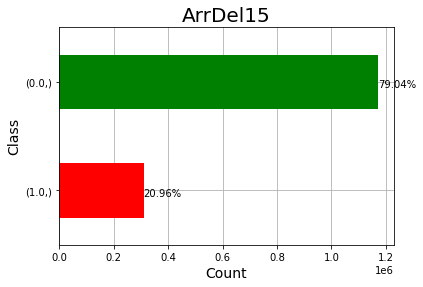

ArrDel15
0.0         1170643
1.0          310505
dtype: int64


In [6]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(classification_labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("ArrDel15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(classification_labels_train).value_counts())
fig = ax.get_figure()
fig.savefig("Img/12_01_Training_ArrDel15_Class_Imbalance.png")

### SMOTE

In [7]:
# smote = SMOTE(n_jobs=-1, random_state=42)
# classification_features_train, classification_labels_train = smote.fit_resample(classification_features_train, classification_labels_train)

In [8]:
# SMOTE takes too long - approx 47 minutes
# classification_features_train.to_csv("./Data/pipe_line_smote_features_train.csv")
# pd.DataFrame(classification_labels_train).to_csv("./Data/pipe_line_smote_labels_train.csv")
classification_features_train = pd.read_csv("./Data/pipe_line_smote_features_train.csv", index_col=0)
classification_labels_train = pd.read_csv("./Data/pipe_line_smote_labels_train.csv", index_col=0)
# print(classification_labels_train.shape)
# print(classification_labels_train)

### Training Data After Handling Imbalance with SMOTE

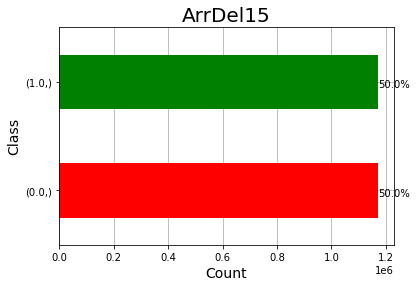

ArrDel15
0.0         1170643
1.0         1170643
dtype: int64


In [9]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(classification_labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("ArrDel15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(classification_labels_train).value_counts())
fig = ax.get_figure()
fig.savefig("Img/12_02_SMOTE_Training_ArrDel15_Class.png")

## Random Forest Classification

In [10]:
# print(classification_labels_train)
classification_labels_train = classification_labels_train["ArrDel15"].values 

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94    292735
         1.0       0.81      0.74      0.78     77553

    accuracy                           0.91    370288
   macro avg       0.87      0.85      0.86    370288
weighted avg       0.91      0.91      0.91    370288



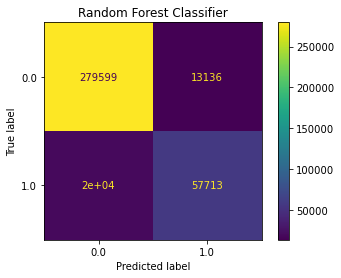

In [11]:
# model = RandomForestClassifier(n_jobs=-1)
# model.fit(classification_features_train, classification_labels_train)
# joblib.dump(model, "./Pipelined/RandomForestClassifier.joblib")
model = joblib.load("./Pipelined/RandomForestClassifier.joblib")
model_pred = model.predict(classification_features_test)
# print(confusion_matrix(classification_labels_test, model_pred))
print(classification_report(classification_labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, classification_features_test, classification_labels_test)
plt.title("Random Forest Classifier")
print(conf_mat_plot)
plt.savefig("Img/12_03_RFC_Confusion_Matrix")
# del model
# del model_pred

## Random Forest Regression

### Filtering data for regression based on predictions of the classifier

In [12]:
#  filter only those flights that are predicted as delayed by the classifier
delayed_flights_features = features_test
# add a column to filter
delayed_flights_features["Predicted_ArrDel15"] = model_pred
delayed_flights_features = delayed_flights_features.loc[:][delayed_flights_features["Predicted_ArrDel15"] == 1.0]
delayed_flights_features = delayed_flights_features.drop(["Predicted_ArrDel15"], axis=1)

In [13]:
delayed_flights_labels = pd.DataFrame(labels_test["ArrDelayMinutes"])
delayed_flights_labels["Predicted_ArrDel15"] = model_pred
delayed_flights_labels = delayed_flights_labels.loc[:][delayed_flights_labels["Predicted_ArrDel15"] == 1.0]
delayed_flights_labels = delayed_flights_labels.drop(["Predicted_ArrDel15"], axis=1)
delayed_flights_labels = np.asarray(delayed_flights_labels["ArrDelayMinutes"])

In [14]:
delayed_flights_features.shape, delayed_flights_labels.shape

((70849, 23), (70849,))

### Splitting Data for Training & Testing

In [15]:
regression_features_train, regression_features_test, regression_labels_train, regression_labels_test = train_test_split(delayed_flights_features, delayed_flights_labels, test_size=0.20, random_state=42)
print(f"regression_features_train shape: {regression_features_train.shape} | regression_features_test shape: {regression_features_test.shape}")
print(f"regression_labels_train shape: {regression_labels_train.shape} | regression_labels_test shape: {regression_labels_test.shape}")

regression_features_train shape: (56679, 23) | regression_features_test shape: (14170, 23)
regression_labels_train shape: (56679,) | regression_labels_test shape: (14170,)


### Random Forest Regressor

In [16]:
# Helper function for regression report - summary metrics
perf_df = pd.DataFrame(columns=["Regressors", "MSE", "RMSE", "MAE", "R2"])
def print_metrics(labels_test, model_pred, regressor_name, perf_df):
    
    mse = mean_squared_error(labels_test, model_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(labels_test, model_pred)
    r2 = r2_score(labels_test, model_pred)
    
    print(f"MSE      : {mse}", end="\n\n")
    print(f"RMSE     : {rmse}", end="\n\n")
    print(f"MAE      : {mae}", end="\n\n")
    print(f"R2 Score : {r2}", end="\n\n")
    
    perf_df = perf_df.append({"Regressors": regressor_name,
                                        "MSE": mse, 
                                        "RMSE": rmse,
                                        "MAE": mae,
                                        "R2": r2}, ignore_index=True)
    return perf_df

### Model Evaluation

In [17]:
# model = RandomForestRegressor(n_jobs=-1)
# model.fit(regression_features_train, regression_labels_train)
# joblib.dump(model, "./Pipelined/RandomForestRegressor.joblib")
model = joblib.load("./Pipelined/RandomForestRegressor.joblib")
model_pred = model.predict(regression_features_test)
perf_df = print_metrics(regression_labels_test, model_pred, "RandomForestRegressor", perf_df)
del model
del model_pred

MSE      : 127.31136136203249

RMSE     : 11.283233639433002

MAE      : 7.178467889908257

R2 Score : 0.9773922614067133



## Regression Analysis

Split the dataset based on the Flight Arrival Delay in Minutes to determine how the regressor performance varies.

In [18]:
regression_features_test["ArrDelayMinutes"] = pd.DataFrame(regression_labels_test)[0].values
print("Min: ", regression_features_test["ArrDelayMinutes"].min())
print("Max: ", regression_features_test["ArrDelayMinutes"].max())
model = joblib.load("./Pipelined/RandomForestRegressor.joblib")

Min:  0.0
Max:  1209.0


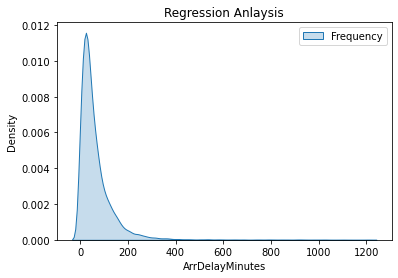

In [19]:
fig, ax = plt.subplots()
sns.kdeplot(regression_features_test["ArrDelayMinutes"], shade=True, label='Frequency')
ax.legend(loc='upper right')
plt.title("Regression Anlaysis")
plt.savefig("./Img/12_04_Regression_Analysis.png")
plt.show()

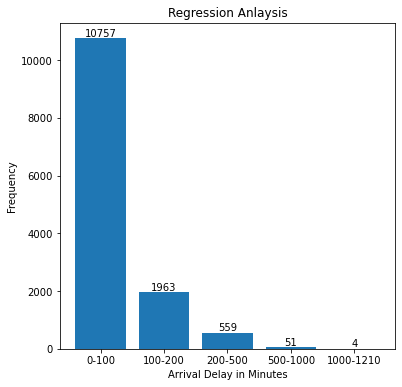

In [20]:
ranges = [0, 100, 200, 500, 1000, 1210]
result = regression_features_test["ArrDelayMinutes"].groupby(pd.cut(regression_features_test["ArrDelayMinutes"], ranges)).count()
data = {'0-100': result[0], '100-200': result[1], '200-500': result[2], '500-1000': result[3],'1000-1210': result[4]}
names = list(data.keys())    
values = list(data.values())

fig, ax = plt.subplots(figsize=(6, 6))
plt.bar(names, values)
plt.title("Regression Anlaysis")
plt.xlabel("Arrival Delay in Minutes")
plt.ylabel("Frequency")

rects = ax.patches
labels = list(result)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.savefig("./Img/12_05_Regression_Analysis_Bar.png")
plt.show()


In [21]:
list(result)

[10757, 1963, 559, 51, 4]

### Range 0 to 100

In [22]:
df = regression_features_test.loc[regression_features_test["ArrDelayMinutes"].isin(list(range(0, 100)))]
print("Shape: ", df.shape, end="\n\n")

X_test = df.drop(columns=["ArrDelayMinutes"])
y_test = df["ArrDelayMinutes"].values

model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "RandomForestRegressor", perf_df)

Shape:  (11550, 24)

MSE      : 96.72068503896105

RMSE     : 9.834667510341214

MAE      : 6.6348761904761915

R2 Score : 0.8564926261830466



### Range 100 to 200

In [23]:
df = regression_features_test.loc[regression_features_test["ArrDelayMinutes"].isin(list(range(100, 200)))]
print("Shape: ", df.shape, end="\n\n")

X_test = df.drop(columns=["ArrDelayMinutes"])
y_test = df["ArrDelayMinutes"].values

model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "RandomForestRegressor", perf_df)

Shape:  (2003, 24)

MSE      : 237.14721268097853

RMSE     : 15.399584821707972

MAE      : 9.194358462306539

R2 Score : 0.6585912158061162



### Range 200 to 500

In [24]:
df = regression_features_test.loc[regression_features_test["ArrDelayMinutes"].isin(list(range(200, 500)))]
print("Shape: ", df.shape, end="\n\n")

X_test = df.drop(columns=["ArrDelayMinutes"])
y_test = df["ArrDelayMinutes"].values

model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "RandomForestRegressor", perf_df)

Shape:  (562, 24)

MSE      : 339.49154039145907

RMSE     : 18.425296209056153

MAE      : 10.801725978647687

R2 Score : 0.9143231037418088



### Range 500 to 1000

In [25]:
df = regression_features_test.loc[regression_features_test["ArrDelayMinutes"].isin(list(range(500, 1000)))]
print("Shape: ", df.shape, end="\n\n")

X_test = df.drop(columns=["ArrDelayMinutes"])
y_test = df["ArrDelayMinutes"].values

model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "RandomForestRegressor", perf_df)

Shape:  (51, 24)

MSE      : 411.11016666666666

RMSE     : 20.275851811124156

MAE      : 11.399411764705883

R2 Score : 0.982030009239282



### Range 1000 to 1210

In [26]:
df = regression_features_test.loc[regression_features_test["ArrDelayMinutes"].isin(list(range(1000, 1525)))]
print("Shape: ", df.shape, end="\n\n")

X_test = df.drop(columns=["ArrDelayMinutes"])
y_test = df["ArrDelayMinutes"].values

model_pred = model.predict(X_test)
perf_df = print_metrics(y_test, model_pred, "RandomForestRegressor", perf_df)

Shape:  (4, 24)

MSE      : 27.83677500000016

RMSE     : 5.276056766184397

MAE      : 4.457499999999982

R2 Score : 0.9950918143348321



In [27]:
perf_df

,Regressors,MSE,RMSE,MAE,R2
0,RandomForestRegressor,127.311361,11.283234,7.178468,0.977392
1,RandomForestRegressor,96.720685,9.834668,6.634876,0.856493
2,RandomForestRegressor,237.147213,15.399585,9.194358,0.658591
3,RandomForestRegressor,339.491540,18.425296,10.801726,0.914323
4,RandomForestRegressor,411.110167,20.275852,11.399412,0.982030
5,RandomForestRegressor,27.836775,5.276057,4.457500,0.995092


In [28]:
del model_pred
del perf_df